# Recommendation System on MovieLens dataset

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Exploration

### User-item interaction data

In [ ]:
# Load the MovieLens 100K dataset
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', 
                      names=['user_id', 'item_id', 'rating', 'timestamp'])

In [ ]:
# First 10 rows of the dataset
ratings.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [14]:
# Number of users, items, and ratings
n_users = ratings['user_id'].nunique()
n_items = ratings['item_id'].nunique()
print(f"Number of users: {n_users}")    
print(f"Number of items: {n_items}")
print(f"Number of ratings: {ratings.shape[0]}")

Number of users: 943
Number of items: 1682
Number of ratings: 100000


<Axes: title={'center': 'Ratings Distribution'}, xlabel='rating'>

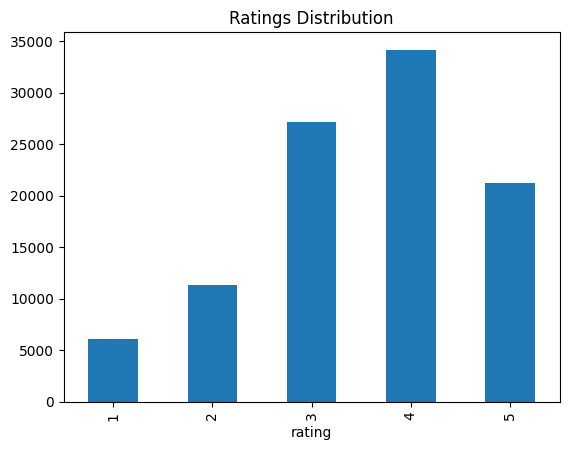

In [15]:
# Ratings distribution
ratings['rating'].value_counts().sort_index().plot(kind='bar', title='Ratings Distribution')

In [16]:
# Sparity of the ratings matrix
sparisity = 1 - len(ratings)/(n_users*n_items)
sparisity

0.9369533063577546

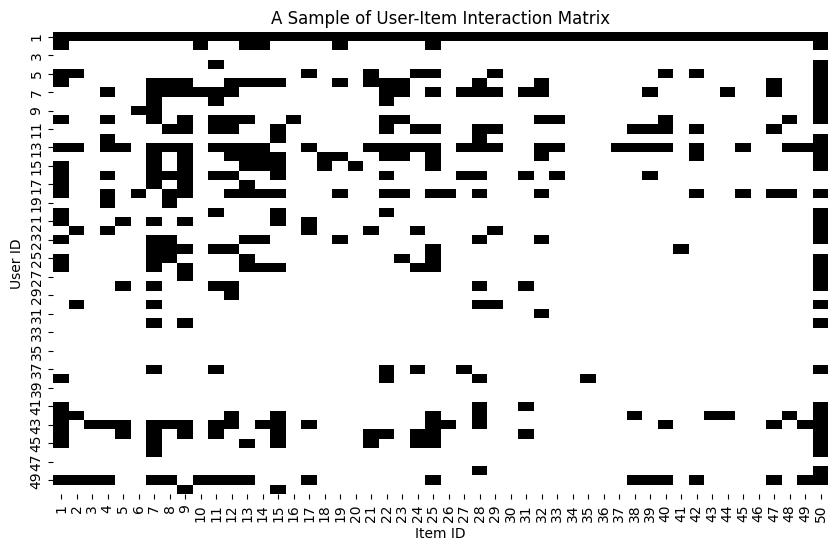

In [77]:
# Create a user-item matrix 
user_item_matrix = ratings.pivot(index='user_id', columns='item_id', values='rating')

binary_matrix = user_item_matrix.notna().astype(int)

# sample a small block for visualization
sample = binary_matrix.loc[1:50, 1:50]  # or .sample(n=40) for random rows/columns

plt.figure(figsize=(10, 6))
sns.heatmap(sample, cmap='Greys', cbar=False)
plt.title('A Sample of User-Item Interaction Matrix')
plt.xlabel('Item ID')
plt.ylabel('User ID')
plt.show()

In [36]:
# Number of ratings per user
user_activities = ratings.groupby('user_id').size()
print("Top 10 most active users:\n",
      user_activities.sort_values(ascending=False).head(10))

Top 10 most active users:
 user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
dtype: int64


Avreage rating per user (first 10 users):
 user_id
1     3.610294
2     3.709677
3     2.796296
4     4.333333
5     2.874286
6     3.635071
7     3.965261
8     3.796610
9     4.272727
10    4.206522
Name: rating, dtype: float64


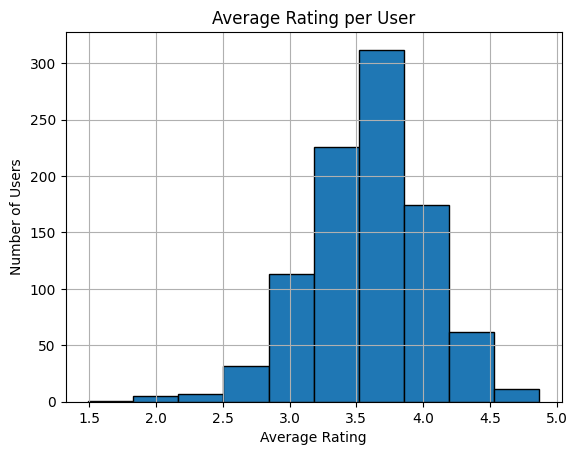

In [55]:
# Average rating per user
avg_rating_per_user = ratings.groupby('user_id')['rating'].mean()
print("Avreage rating per user (first 10 users):\n",
      avg_rating_per_user.head(10))
# Histogram of average ratings per user
avg_rating_per_user.hist(bins=10, edgecolor='black')
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()


Average rating per item (first 10 items):
item_id
1     3.878319
2     3.206107
3     3.033333
4     3.550239
5     3.302326
6     3.576923
7     3.798469
8     3.995434
9     3.896321
10    3.831461
Name: rating, dtype: float64


Text(0, 0.5, 'Number of Items')

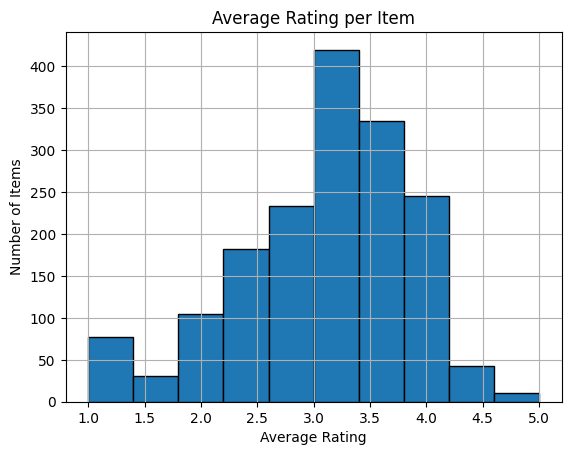

In [54]:
# Average rating per item
avg_rating_per_item = ratings.groupby('item_id')['rating'].mean()
print("\nAverage rating per item (first 10 items):")
print(avg_rating_per_item.head(10))
# Histogram of average ratings per item
avg_rating_per_item.hist(bins=10, edgecolor='black')
plt.title('Average Rating per Item')
plt.xlabel('Average Rating')
plt.ylabel('Number of Items')

### Item-genre data

In [62]:
# Get genres of movies
movie_genres = pd.read_csv('../data/ml-100k/u.genre', sep='|', encoding='latin-1',
                           usecols=[0],names=['genre'])
movie_genres

,genre
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's
5,Comedy
6,Crime
7,Documentary
8,Drama
9,Fantasy


In [63]:
# Get movie's genre
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', encoding='latin-1',
                     index_col=0, header=None, 
                     names=['item_id'] + movie_genres['genre'].to_list(), 
                     usecols=[0] + list(range(5, 24)))
movies.head(10)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0



Number of movies per genre:
Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Children's     122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          2
dtype: int64


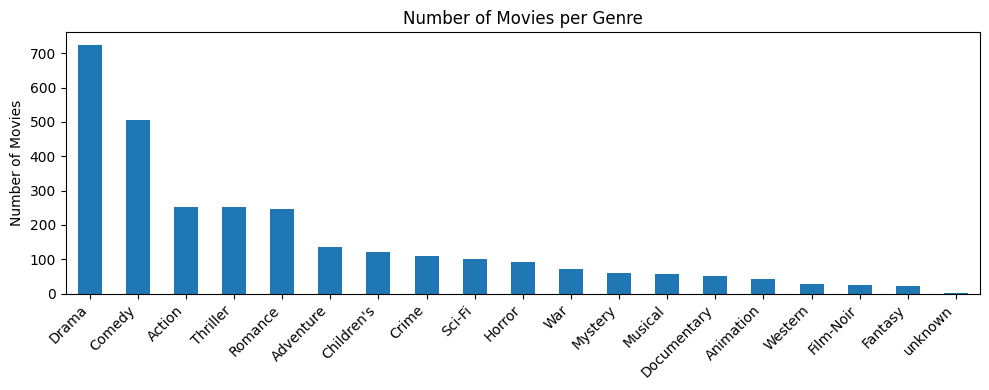

In [ ]:
genre_movie_counts = movies.sum(axis=0).sort_values(ascending=False)
# Display
print("\nNumber of movies per genre:")
print(genre_movie_counts)
# Plot the number of movies per genre
genre_movie_counts.plot(kind='bar', figsize=(10, 4), title='Number of Movies per Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average rating per genre:
             avg_rating
Film-Noir      3.921523
War            3.815812
Drama          3.687379
Documentary    3.672823
Mystery        3.638132
Crime          3.632278
Romance        3.621705
Western        3.613269
Animation      3.576699
Sci-Fi         3.560723
Musical        3.521397
Thriller       3.509007
Adventure      3.503527
Action         3.480245
Comedy         3.394073
Children's     3.353244
Horror         3.290389
Fantasy        3.215237
unknown        3.200000


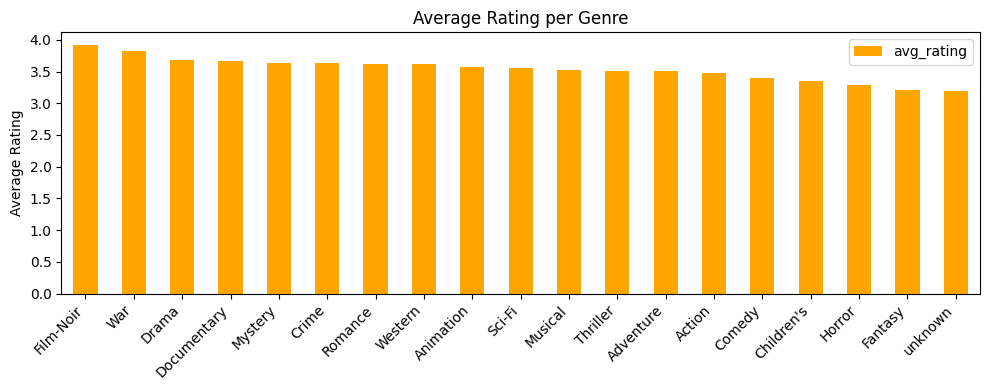

In [ ]:
# Merge ratings with genre info
ratings_with_genres = pd.merge(ratings.reset_index(), movies, on='item_id')

# Calculate average rating per genre
avg_rating_per_genre = {}

for genre in movie_genres['genre']:
    genre_ratings = ratings_with_genres[ratings_with_genres[genre] == 1]['rating']
    avg_rating_per_genre[genre] = genre_ratings.mean()

avg_rating_df = pd.DataFrame.from_dict(avg_rating_per_genre, orient='index', columns=['avg_rating'])
avg_rating_df = avg_rating_df.sort_values(by='avg_rating', ascending=False)

print("\nAverage rating per genre:")
print(avg_rating_df)
# Plot average rating per genre
avg_rating_df.plot(kind='bar', figsize=(10, 4), color='orange', title='Average Rating per Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()